# Gradient of Image

## import library

In [30]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [31]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [32]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [33]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = np.mean(I0, axis=2)
    
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [34]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I - np.min(I))/np.ptp(I)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [35]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    D = np.roll(D, shift = -1, axis=0) - D
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [36]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    D = D - np.roll(D, shift=1, axis=0)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [37]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    D = (np.roll(D, shift=-1, axis=0) - np.roll(D, shift=1, axis=0))/2
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [38]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    D = np.roll(D, shift=-1, axis =1) -D
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [39]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    D = D - np.roll(D, shift=1, axis=1)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [40]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    D = (np.roll(D, shift=-1, axis=1) - np.roll(D, shift=1, axis=1))/2
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [41]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    x = np.identity(I.shape[1])
    x = -x + np.eye(I.shape[1],k=-1)
    nx = np.dot(I,x)
    y = np.identity(I.shape[0])
    y = -y + np.eye(I.shape[0],k=1)
    ny = np.dot(y,I)
    norm_gradient = np.add(np.square(nx), np.square(ny))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [42]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [43]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [44]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [45]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [46]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [47]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [48]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [49]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [50]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [51]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [52]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [53]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [54]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [55]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [56]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [57]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [58]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


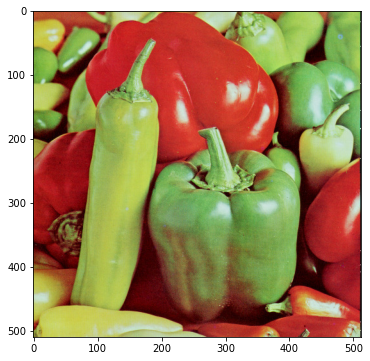

**************************************************
## [RESULT 02]
**************************************************


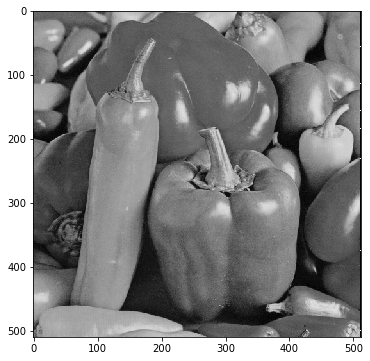

**************************************************
## [RESULT 03]
**************************************************


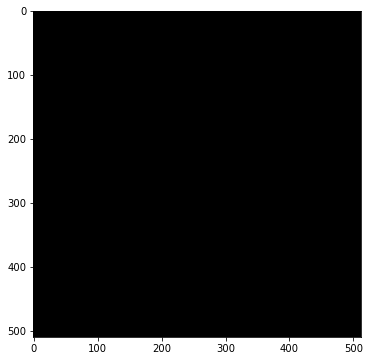

**************************************************
## [RESULT 04]
**************************************************


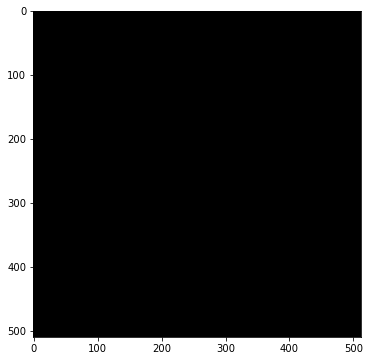

**************************************************
## [RESULT 05]
**************************************************


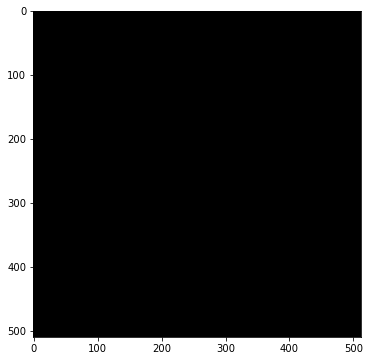

**************************************************
## [RESULT 06]
**************************************************


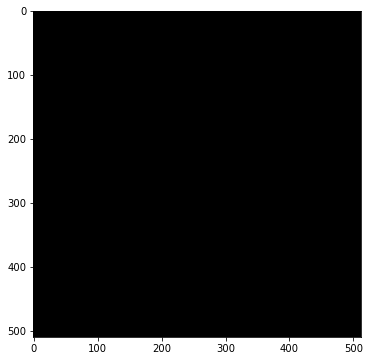

**************************************************
## [RESULT 07]
**************************************************


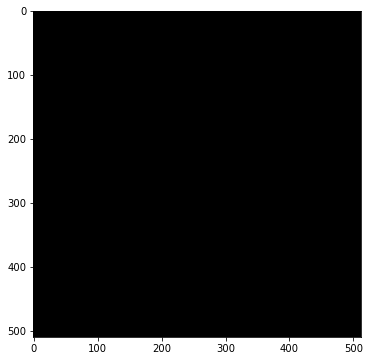

**************************************************
## [RESULT 08]
**************************************************


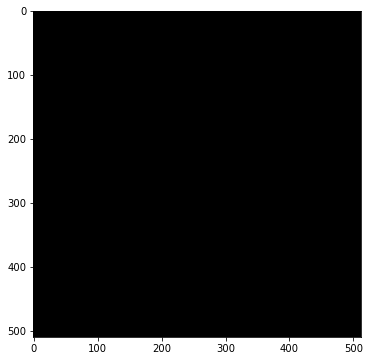

**************************************************
## [RESULT 09]
**************************************************


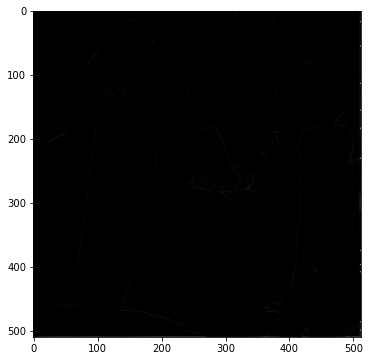

**************************************************
## [RESULT 10]
**************************************************


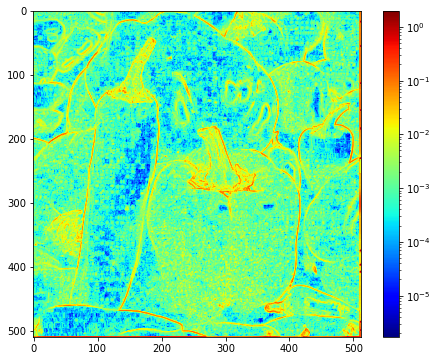

**************************************************
## [RESULT 11]
**************************************************
value1 =  0.0
value2 =  0.0
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.0
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 13]
**************************************************
value1 =  0.0
value2 =  0.0
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 14]
**************************************************
value1 =  0.0
value2 =  0.0
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 15]
**************************************************
value1 =  0.0
value2 =  0.0
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 16]
**************************************************
value1 =  0.0
valu

In [59]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)